<a href="https://colab.research.google.com/github/rasheibani/Trajectory-Analysis/blob/main/SPARC_day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview of `movingpandas`

`movingpandas` is a Python library that extends the capabilities of `GeoPandas` to handle movement data. It provides tools for trajectory data analysis and visualization. `movingpandas` is useful for a variety of applications, such as GPS tracking, animal movement studies, transportation research, and more.

### Key Features

- **Trajectory Creation**: Create and manipulate trajectory objects from movement data.
- **Data Aggregation**: Aggregate trajectories to analyze movement patterns over time.
- **Trajectory Visualization**: Visualize trajectories using maps and other plotting techniques.
- **Geospatial Analysis**: Perform geospatial operations on trajectories, including buffering, spatial joins, and intersection checks.
- **Spatiotemporal Queries**: Execute spatiotemporal queries to analyze movement data.

### Installation

To install `movingpandas`, you can use the following `pip` command:

```python
!pip install movingpandas


## Installing the `movingpandas` Package

To analyze and visualize movement data in Python, we will use the `movingpandas` [package](https://movingpandas.readthedocs.io/en/main/index.html). This package builds on top of the [GeoPandas](https://geopandas.org/en/stable/) library and provides functionality to handle movement data.

To install `movingpandas`, and other libraries needed you can use the following `pip` command:


In [ ]:
!pip install ezgpx movingpandas hvplot holoviews geopy cartopy geoviews

## Loading `SampleGPX` File

In this section, we will load our `SampleGPX` file and convert it into a DataFrame using the `ezgpx` library. This will allow us to analyze the GPX data more effectively.


In [ ]:
import ezgpx
from google.colab import drive

drive.mount('/content/drive')
# Define the path to the GPX file
gpx_file_path = '/content/drive/MyDrive/GPX/SampleGPX.gpx'

gpx = ezgpx.GPX(gpx_file_path)
df = gpx.to_dataframe()
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,lat,lon,ele,time
0,-37.758132,145.060026,64.2,2024-05-25 22:09:20+00:00
1,-37.758106,145.060061,64.0,2024-05-25 22:09:21+00:00
2,-37.758078,145.060097,63.6,2024-05-25 22:09:22+00:00
3,-37.758047,145.060128,63.4,2024-05-25 22:09:23+00:00
4,-37.758017,145.060160,63.2,2024-05-25 22:09:24+00:00
...,...,...,...,...
11036,-37.757867,145.060361,60.0,2024-05-26 02:28:57+00:00
11037,-37.757919,145.060307,60.2,2024-05-26 02:28:58+00:00
11038,-37.757939,145.060288,60.4,2024-05-26 02:28:59+00:00
11039,-37.757956,145.060282,60.4,2024-05-26 02:29:00+00:00


## Creating and Plotting a Trajectory from `SampleGPX` Data

In this section, we will use `GeoPandas` and `movingpandas` to create a trajectory from the `SampleGPX` data and plot it.

### Steps to Create and Plot a Trajectory

1. **Import Necessary Libraries**:
    We need to import `geopandas`, `movingpandas`, and `matplotlib` for geospatial data handling and plotting.


2. **Create a Trajectory**:
    We create a trajectory from the DataFrame obtained from the GPX file. The trajectory is created by specifying the DataFrame, the ID column, and the columns representing time, longitude, and latitude.

3. **Plot the Trajectory**:
    We plot the trajectory using the `plot` method from the `movingpandas` library and display it using `matplotlib`.



/usr/local/lib/python3.10/dist-packages/movingpandas/trajectory.py:138: TimeZoneWarning: Time zone information dropped from trajectory. All dates and times will use local time. This is applied by doing df.tz_localize(None). To use UTC or a different time zone, convert and drop time zone information prior to trajectory creation.
  warnings.warn(


Trajectory SampleGPX (2024-05-25 22:09:20 to 2024-05-26 02:29:01) | Size: 11041 | Length: 52742.0m
Bounds: (145.060026, -37.821899, 145.205287, -37.734489)
LINESTRING (145.060026 -37.758132, 145.060061 -37.758106, 145.060097 -37.758078, 145.060128 -37.7580


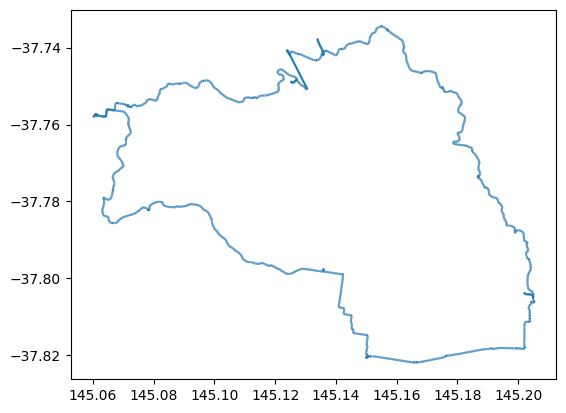

In [ ]:
import geopandas as gpd
import movingpandas as mpd
import matplotlib.pyplot as plt


traj = mpd.Trajectory(df,'SampleGPX',  t='time', x='lon', y='lat')
print(traj)

# Plot the trajectory
traj.plot()
plt.show()

## Enhancing and Plotting Trajectory with Speed

In this section, we will enhance our trajectory data by calculating the speed and then plot the trajectory with speed information using `movingpandas`.

### Steps to Enhance and Plot Trajectory with Speed

1. **Ensure the 'time' Column is in Datetime Format**:
    Convert the 'time' column in the DataFrame to datetime format to ensure accurate time-based calculations.


2. **Add Speed to the Trajectory**:
    Use the `add_speed` method from the `Trajectory` class to calculate and add speed to the trajectory.


3. **Plot the Trajectory with Speed**:
    Plot the trajectory with speed information. Use different colors to represent different sp


<Axes: >

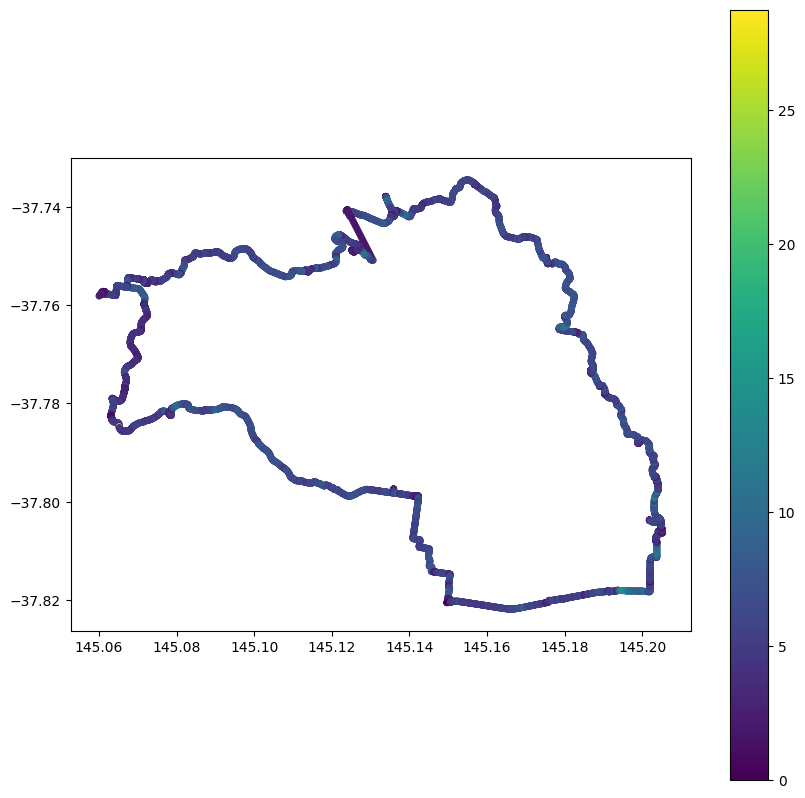

In [ ]:
import pandas as pd
# Ensure the 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])
traj.add_speed(overwrite=True)
ax = traj.plot(figsize=(10,10))
traj.plot(ax = ax, column="speed", linewidth=5, capstyle='round', legend=True)

## Enhancing Trajectory with Direction and Time Delta

In this section, we will further enhance our trajectory data by calculating the direction and time delta for each segment of the trajectory using `movingpandas`.


In [ ]:
traj.add_direction(overwrite=True)
traj.add_timedelta(overwrite=True)

traj.df

,ele,geometry,traj_id,speed,direction,timedelta
time,,,,,,
2024-05-25 22:09:20,64.2,POINT (145.06003 -37.75813),SampleGPX,4.223755,46.783391,NaT
2024-05-25 22:09:21,64.0,POINT (145.06006 -37.75811),SampleGPX,4.223755,46.783391,0 days 00:00:01
2024-05-25 22:09:22,63.6,POINT (145.06010 -37.75808),SampleGPX,4.440936,45.468533,0 days 00:00:01
2024-05-25 22:09:23,63.4,POINT (145.06013 -37.75805),SampleGPX,4.393300,38.330026,0 days 00:00:01
2024-05-25 22:09:24,63.2,POINT (145.06016 -37.75802),SampleGPX,4.363351,40.141302,0 days 00:00:01
...,...,...,...,...,...,...
2024-05-26 02:28:57,60.0,POINT (145.06036 -37.75787),SampleGPX,4.019431,226.222189,0 days 00:00:01
2024-05-26 02:28:58,60.2,POINT (145.06031 -37.75792),SampleGPX,7.480272,219.386428,0 days 00:00:01
2024-05-26 02:28:59,60.4,POINT (145.06029 -37.75794),SampleGPX,2.780453,216.909276,0 days 00:00:01


## Plotting the Trajectory with Holoviews

In this section, we will use `hvplot` from the Holoviews library to create an interactive plot of the trajectory, color-coded by speed. Note that running this code may take up to 5 minutes.

### Explanation

- **Plot the Trajectory with `hvplot`**:
  - The `hvplot` method creates an interactive plot of the trajectory.
  - Parameters:
    - `c='speed'`: Colors the trajectory based on the speed values.
    - `clim=(0, 20)`: Sets the color limits for the speed values.
    - `line_width=7.0`: Sets the width of the trajectory line.
    - `tiles='CartoLight'`: Uses the CartoLight tiles for the map background.
    - `cmap='Viridis'`: Uses the Viridis colormap for the speed values.
    - `colorbar=True`: Displays a colorbar on the


In [ ]:
traj.hvplot(c='speed', clim=(0,20), line_width=7.0, tiles='CartoLight', cmap='Viridis', colorbar=True)
traj.hvplot

<bound method Trajectory.hvplot of Trajectory SampleGPX_2024-05-26 02:28:27 (2024-05-26 02:28:27 to 2024-05-26 02:29:01) | Size: 35 | Length: 74.8m
Bounds: (145.060277, -37.757976, 145.060891, -37.757554)
LINESTRING (145.060891 -37.757554, 145.060875 -37.757564, 145.060861 -37.757574, 145.060848 -37.7575>

## Detecting Stops in the Trajectory

In this section, we will use the `TrajectoryStopDetector` from the `movingpandas` library to detect stops in the trajectory data.

- **Create a Stop Detector**:
  - The `TrajectoryStopDetector` class is used to identify stops within a trajectory.
  - A stop is typically defined as a period when the movement is below a certain speed threshold for a specified duration.
  - This detector can help analyze movement patterns and identify periods of inactivity within the trajectory.


In [ ]:
detector = mpd.TrajectoryStopDetector(traj)

## Identifying Stop Time Ranges in the Trajectory
We will use the `TrajectoryStopDetector` to identify and print the stop time ranges within the trajectory data.


In [ ]:
from datetime import datetime, timedelta

stop_time_ranges = detector.get_stop_time_ranges(min_duration=timedelta(seconds=60), max_diameter=100)
for x in stop_time_ranges:
    print(x)


Traj SampleGPX: 2024-05-25 22:09:30 - 2024-05-25 22:10:53 (duration: 0 days 00:01:23)
Traj SampleGPX: 2024-05-25 22:10:54 - 2024-05-25 22:11:54 (duration: 0 days 00:01:00)
Traj SampleGPX: 2024-05-25 22:15:02 - 2024-05-25 22:18:29 (duration: 0 days 00:03:27)
Traj SampleGPX: 2024-05-25 22:28:45 - 2024-05-25 22:30:19 (duration: 0 days 00:01:34)
Traj SampleGPX: 2024-05-25 22:33:40 - 2024-05-25 22:34:43 (duration: 0 days 00:01:03)
Traj SampleGPX: 2024-05-25 22:34:44 - 2024-05-25 22:35:57 (duration: 0 days 00:01:13)
Traj SampleGPX: 2024-05-25 22:41:01 - 2024-05-25 22:42:02 (duration: 0 days 00:01:01)
Traj SampleGPX: 2024-05-25 22:58:21 - 2024-05-25 22:59:36 (duration: 0 days 00:01:15)
Traj SampleGPX: 2024-05-25 23:00:52 - 2024-05-25 23:01:52 (duration: 0 days 00:01:00)
Traj SampleGPX: 2024-05-25 23:01:53 - 2024-05-25 23:03:21 (duration: 0 days 00:01:28)
Traj SampleGPX: 2024-05-25 23:12:31 - 2024-05-25 23:13:32 (duration: 0 days 00:01:01)
Traj SampleGPX: 2024-05-25 23:14:25 - 2024-05-26 00:15

## Identifying Stop Points in the Trajectory

In this section, we will use the `TrajectoryStopDetector` to identify and display the stop points within the trajectory data.


- **Get Stop Points**:
  - The `get_stop_points` method identifies the specific locations where the trajectory experienced stops.
  - Parameters:
    - `min_duration=timedelta(seconds=60)`: Minimum duration for a stop to be considered valid.
    - `max_diameter=100`: Maximum spatial diameter within which movement is considered a stop.

- **Display Stop Points**:
  - The `head` method is used to display the first few rows of the resulting DataFrame, which contains the identified stop points.
  - This provides a quick view of the locations and details of the stops within the trajectory.


In [ ]:
stop_points = detector.get_stop_points(min_duration=timedelta(seconds=60), max_diameter=100)
stop_points.head()


,geometry,start_time,end_time,traj_id,duration_s
stop_id,,,,,
SampleGPX_2024-05-25 22:09:30,POINT (145.06062 -37.75762),2024-05-25 22:09:30,2024-05-25 22:10:53,SampleGPX,83.0
SampleGPX_2024-05-25 22:10:54,POINT (145.06145 -37.75732),2024-05-25 22:10:54,2024-05-25 22:11:54,SampleGPX,60.0
SampleGPX_2024-05-25 22:15:02,POINT (145.07164 -37.75987),2024-05-25 22:15:02,2024-05-25 22:18:29,SampleGPX,207.0
SampleGPX_2024-05-25 22:28:45,POINT (145.06664 -37.77704),2024-05-25 22:28:45,2024-05-25 22:30:19,SampleGPX,94.0
SampleGPX_2024-05-25 22:33:40,POINT (145.06312 -37.78253),2024-05-25 22:33:40,2024-05-25 22:34:43,SampleGPX,63.0


## Plotting Stop Points on the Trajectory

We will plot the stop points on the trajectory to visualize the locations where stops occurred.


- **Plot the Trajectory**:
  - The `plot` method of the `Trajectory` object creates a plot of the trajectory.
  - The `figsize` parameter sets the size of the plot.

- **Plot the Stop Points**:
  - The `plot` method of the `GeoDataFrame` containing the stop points is used to overlay the stop points on the trajectory plot.
  - The `ax` parameter specifies the existing plot to overlay the points on.
  - The `color='red'` parameter sets the color of the stop points to red for better visibility.

By following these steps, you can visualize the stop points on the trajectory, providing a clear view of where stops occurred.


<Axes: >

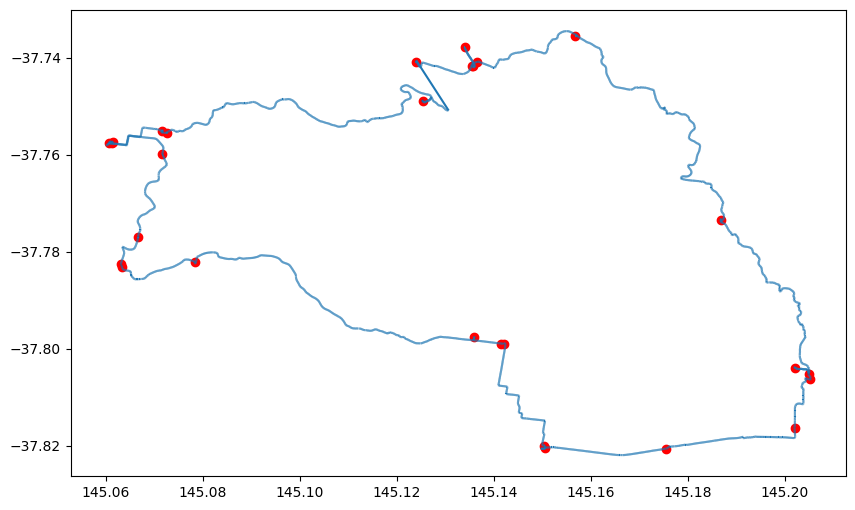

In [ ]:
ax = traj.plot(figsize=(10,10))
stop_points.plot(ax=ax, color='red')


## Identifying Stop Segments in the Trajectory

In this section, we will use the `TrajectoryStopDetector` to identify and display the stop segments within the trajectory data.


- **Get Stop Segments**:
  - The `get_stop_segments` method identifies segments of the trajectory where stops occurred.
  - Parameters:
    - `min_duration=timedelta(seconds=60)`: Minimum duration for a stop to be considered valid.
    - `max_diameter=100`: Maximum spatial diameter within which movement is considered a stop.

- **Display Stop Segments**:
  - Displaying the `stop_segments` variable will provide details of the segments where stops were identified.


In [ ]:
stop_segments = detector.get_stop_segments(min_duration=timedelta(seconds=60), max_diameter=100)
stop_segments

TrajectoryCollection with 28 trajectories

## Splitting the Trajectory into Segments

In this section, we will use the `StopSplitter` from the `movingpandas` library to split the trajectory into segments based on stop criteria and then convert the segments into a GeoDataFrame.

### Steps to Split the Trajectory into Segments


- **Split the Trajectory**:
  - The `StopSplitter` class is used to split the trajectory into segments.
  - The `split` method splits the trajectory based on specified stop criteria.
  - Parameters:
    - `min_duration=timedelta(seconds=60)`: Minimum duration for a stop to be considered valid.
    - `max_diameter=100`: Maximum spatial diameter within which movement is considered a stop.

- **Convert the Segments to a GeoDataFrame**:
  - The `to_traj_gdf` method converts the split segments into a GeoDataFrame for further analysis and visualization.

you can split your trajectory into meaningful segments based on stop criteria and convert the segments into a GeoDataFrame for further analysis.


In [ ]:
split = mpd.StopSplitter(traj).split(min_duration=timedelta(seconds=60), max_diameter=100)

split.to_traj_gdf()


,traj_id,start_t,end_t,geometry,length,direction
0,SampleGPX_2024-05-25 22:09:20,2024-05-25 22:09:20,2024-05-25 22:09:30,"LINESTRING (145.06003 -37.75813, 145.06006 -37...",46.374184,41.488427
1,SampleGPX_2024-05-25 22:10:53,2024-05-25 22:10:53,2024-05-25 22:10:54,"LINESTRING (145.06116 -37.75737, 145.06120 -37...",4.493754,48.053807
2,SampleGPX_2024-05-25 22:11:54,2024-05-25 22:11:54,2024-05-25 22:15:02,"LINESTRING (145.06219 -37.75773, 145.06226 -37...",1206.062270,99.786095
3,SampleGPX_2024-05-25 22:18:29,2024-05-25 22:18:29,2024-05-25 22:28:45,"LINESTRING (145.07169 -37.75992, 145.07170 -37...",2252.378260,193.442448
4,SampleGPX_2024-05-25 22:30:19,2024-05-25 22:30:19,2024-05-25 22:33:40,"LINESTRING (145.06661 -37.77714, 145.06661 -37...",821.916977,209.362543
5,SampleGPX_2024-05-25 22:34:43,2024-05-25 22:34:43,2024-05-25 22:34:44,"LINESTRING (145.06317 -37.78274, 145.06317 -37...",0.561910,188.982308
6,SampleGPX_2024-05-25 22:35:57,2024-05-25 22:35:57,2024-05-25 22:41:01,"LINESTRING (145.06349 -37.78357, 145.06352 -37...",1529.396587,80.593834
7,SampleGPX_2024-05-25 22:42:02,2024-05-25 22:42:02,2024-05-25 22:58:21,"LINESTRING (145.07829 -37.78238, 145.07831 -37...",6345.298411,109.316899
8,SampleGPX_2024-05-25 22:59:36,2024-05-25 22:59:36,2024-05-25 23:00:52,"LINESTRING (145.13580 -37.79821, 145.13581 -37...",432.381717,98.853368
9,SampleGPX_2024-05-25 23:01:52,2024-05-25 23:01:52,2024-05-25 23:01:53,"LINESTRING (145.14174 -37.79893, 145.14178 -37...",3.946384,106.399981


## Plotting Stop Segments and Split Trajectory Segments

We will plot the stop segments and split trajectory segments with random colors for better visualization.

- **Import Necessary Library**:
  - `random`: Used to generate random colors for the split trajectory segments.

- **Define a Function to Generate Random Colors**:
  - `random_color`: A function that returns a list of three random values between 0 and 1, representing an RGB color.

- **Plot the Stop Segments and Split Trajectory Segments**:
  - Use `matplotlib` to create a plot.
  - Plot each stop segment in red with a wider line.
  - Plot each split trajectory segment with a random color and a thinner line.



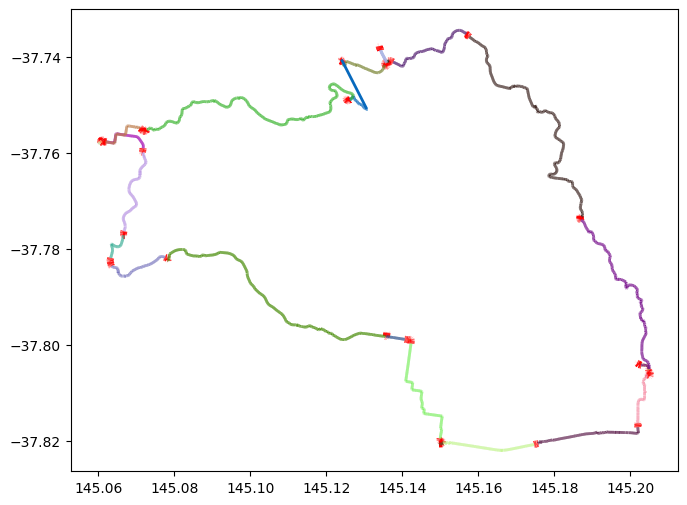

In [ ]:
import random
# Function to generate random color
def random_color():
    return [random.random() for _ in range(3)]

# Plot the stop_segments with random colors
fig, ax = plt.subplots(figsize=(10, 6))


for stop in stop_segments:
  stop.plot(ax=ax, color='red', linewidth=5)

for segment in split:
  segment.plot(ax=ax, color=random_color(), linewidth=2)

## Calculating Average Speed of Split Segments

In this section, we will calculate and print the average speed of each split trajectory segment and determine the overall average speed of all moving parts.


### Explanation

- **Initialize a List to Store Average Speeds**:
  - `segments_avg_speed`: A list to store the average speed of each split segment.

- **Calculate and Print Average Speed for Each Segment**:
  - Iterate through each trajectory ID in the split segments.
  - Use `get_trajectory` to get the trajectory object for each segment.
  - Calculate the average speed of the segment using the `mean` method on the `speed` column.
  - Convert the speed from meters per second to kilometers per hour (by multiplying by 3.6) and print the result.
  - Append the average speed to the `segments_avg_speed` list.

- **Calculate and Print the Overall Average Speed**:
  - Calculate the overall average speed by dividing the sum of `segments_avg_speed` by the number of segments.
  - Print the overall average speed.

By following these steps, you can calculate and print the average speed of each split trajectory segment and determine the overall average speed of all moving parts.


In [ ]:
# same as day 2 function
def classify_mode(average_speed):
    if average_speed < 5:
        return 'Walking'
    elif 5 <= average_speed < 15:
        return 'Running'
    elif 15 <= average_speed < 25:
        return 'Cycling'
    else:
        return 'Driving'

# we create a list to add each segment avg speed one by one
segments_avg_speed=[]

for trajid in split.to_traj_gdf()['traj_id']:
  traj = split.get_trajectory(trajid)
  avg_speed = traj.df['speed'].mean()
  print(trajid, round(avg_speed*3.6, 1), 'Km/h')
  # add the avg to the list
  segments_avg_speed.append(avg_speed*3.6)


overall_avg = sum(segments_avg_speed)/len(segments_avg_speed)


print('The overall speed average of moving parts is', round(overall_avg,3), '. So, the mode is', classify_mode(overall_avg))




SampleGPX_2024-05-25 22:09:20 16.6 Km/h
SampleGPX_2024-05-25 22:10:53 16.7 Km/h
SampleGPX_2024-05-25 22:11:54 23.1 Km/h
SampleGPX_2024-05-25 22:18:29 13.1 Km/h
SampleGPX_2024-05-25 22:30:19 14.7 Km/h
SampleGPX_2024-05-25 22:34:43 1.6 Km/h
SampleGPX_2024-05-25 22:35:57 18.1 Km/h
SampleGPX_2024-05-25 22:42:02 23.3 Km/h
SampleGPX_2024-05-25 22:59:36 20.4 Km/h
SampleGPX_2024-05-25 23:01:52 14.1 Km/h
SampleGPX_2024-05-25 23:03:21 19.4 Km/h
SampleGPX_2024-05-25 23:13:32 9.4 Km/h
SampleGPX_2024-05-26 00:15:28 19.9 Km/h
SampleGPX_2024-05-26 00:22:56 20.8 Km/h
SampleGPX_2024-05-26 00:31:39 18.4 Km/h
SampleGPX_2024-05-26 00:37:20 4.0 Km/h
SampleGPX_2024-05-26 00:39:45 10.1 Km/h
SampleGPX_2024-05-26 00:42:36 20.6 Km/h
SampleGPX_2024-05-26 00:58:27 21.5 Km/h
SampleGPX_2024-05-26 01:21:30 20.3 Km/h
SampleGPX_2024-05-26 01:30:07 14.5 Km/h
SampleGPX_2024-05-26 01:31:29 19.7 Km/h
SampleGPX_2024-05-26 01:36:49 25.1 Km/h
SampleGPX_2024-05-26 01:38:48 22.8 Km/h
SampleGPX_2024-05-26 01:43:01 22.4 Km/h
Sam

## Importance of Stop Detection in Trajectory Analysis

### Context and Original Analysis

When analyzing movement data, it is crucial to account for periods of inactivity or stops to obtain accurate insights into the overall movement behavior. In the initial analysis of our `SampleGPX.gpx` file, we calculated an average speed of 12.19 km/h and classified the activity mode as "Running." However, this calculation included periods when the movement had stopped, such as during coffee breaks, breakfast, or waiting at red lights.

### Enhanced Analysis with Stop Detection

By incorporating stop detection into our analysis, we were able to filter out these periods of inactivity and focus solely on the moving parts of the trajectory. This resulted in a more meaningful and accurate calculation of the average speed:

- **Original Average Speed**: 12.19 km/h (including stops)
- **Overall Speed Average of Moving Parts**: 16.73 km/h (excluding stops)

### Significance of Stop Detection

- **Accurate Speed Calculations**: By removing stops, we obtain a true representation of the average speed during active movement, which is crucial for correctly classifying the mode of transportation or activity.
- **Meaningful Insights**: The refined average speed of 16.73 km/h aligns more closely with cycling, which was the actual mode of transportation. This adjustment is significant because it corrects the earlier misclassification of the activity as "Running."
- **Improved Analysis and Decision Making**: Accurate movement analysis helps in various applications, including sports performance tracking, transportation planning, and wildlife movement studies. Understanding the true movement patterns can lead to better decision-making and more effective strategies.

### Conclusion

In conclusion, stop detection is a vital step in trajectory analysis. By filtering out periods of inactivity, we can derive more accurate and meaningful insights from movement data. In our case, recognizing and removing stops allowed us to correctly identify the activity mode and obtain a more accurate average speed, enhancing the overall quality and reliability of our analysis.

This example demonstrates the importance of preprocessing movement data to account for stops, ensuring that our conclusions and insights truly reflect the underlying movement behavior.
